In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("titanic_toy.csv")
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.shape

(891, 4)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [7]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:3],df.iloc[:,3],random_state=42,test_size=0.2)

In [9]:
X_train.isnull().mean()*100

Age       19.662921
Fare       5.056180
Family     0.000000
dtype: float64

In [11]:
mean_age = X_train["Age"].mean()
median_age = X_train["Age"].median()

mean_fare = X_train["Fare"].mean()
median_fare = X_train["Fare"].median()

In [12]:
X_train["Age_mean"] = X_train["Age"].fillna(mean_age)
X_train["Age_median"] = X_train["Age"].fillna(median_age)
X_train["Fare_mean"] = X_train["Fare"].fillna(mean_fare)
X_train["Fare_median"] = X_train["Fare"].fillna(median_fare)
X_train.head()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
331,45.5,28.5000,0,45.5,45.5,28.5000,28.5000
733,23.0,13.0000,0,23.0,23.0,13.0000,13.0000
382,32.0,7.9250,0,32.0,32.0,7.9250,7.9250
704,26.0,7.8542,1,26.0,26.0,7.8542,7.8542
813,6.0,31.2750,6,6.0,6.0,31.2750,31.2750


In [14]:
# we have to check the variance now because we have filled missing values with mean and median
# If there is drastic change in variance then we have to think about it
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  210.2517072477435
Age Variance after median imputation:  169.20731007048155
Age Variance after mean imputation:  168.85193366872227
Original Fare variable variance:  2761.0314349486343
Fare Variance after median imputation:  2637.012481677765
Fare Variance after mean imputation:  2621.232374951235


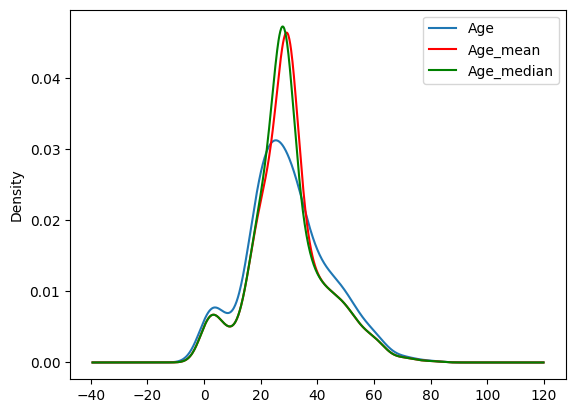

In [17]:
#we should check for distribution 
fig = plt.figure()
ax = plt.subplot(111)
# original value distribution
X_train["Age"].plot(kind="kde",ax=ax)
#mean
X_train["Age_mean"].plot(kind="kde",ax=ax,color="red")
#median
X_train["Age_median"].plot(kind="kde",ax=ax,color="green")
plt.legend()

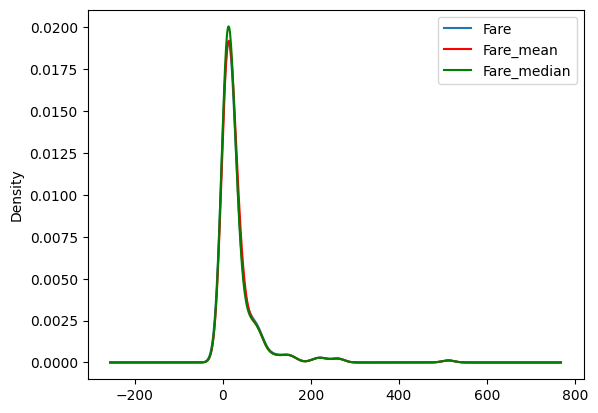

In [18]:
#we should check for distribution 
fig = plt.figure()
ax = plt.subplot(111)
# original value distribution
X_train["Fare"].plot(kind="kde",ax=ax)
#mean
X_train["Fare_mean"].plot(kind="kde",ax=ax,color="red")
#median
X_train["Fare_median"].plot(kind="kde",ax=ax,color="green")
plt.legend()

In [19]:
#we have to check for correlation and covariance
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [20]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<Axes: >

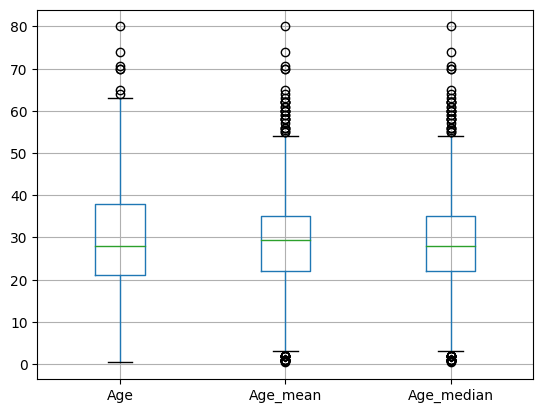

In [22]:
#at last we should see the boxplot
X_train[["Age","Age_mean","Age_median"]].boxplot()

<Axes: >

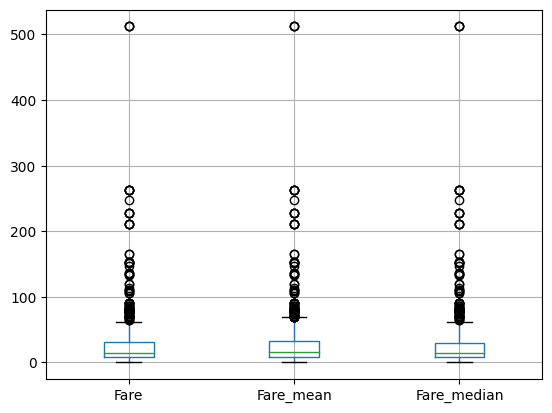

In [23]:
X_train[["Fare","Fare_mean","Fare_median"]].boxplot()

<h3>Using SKlearn</h3>

In [24]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:3],df.iloc[:,3],random_state=42,test_size=0.2)

In [25]:
simpleimputer1 = SimpleImputer(strategy="median")
simpleimputer2 = SimpleImputer(strategy="mean")

In [26]:
trf = ColumnTransformer([
    ("imp1",simpleimputer1,["Age"]),
    ("imp2",simpleimputer2,["Fare"])
],remainder="passthrough")


In [27]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imp2', SimpleImputer(), ['Fare'])])

In [31]:
trf.named_transformers_['imp1'].statistics_

array([28.])

In [30]:
trf.named_transformers_['imp2'].statistics_

array([32.51778772])